In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load FFT data from a folder and assign labels
def load_data(file_path, label):
    X = []
    y = []
    with open(file_path, "r") as f:
                # Iterate over each line in the file
                for line in f:
                    # Split the line by comma (or any other delimiter)
                    values = line.strip().split(",")
                    try:
                        # Convert string values to floats
                        data = [float(value) for value in values]
                        X.append(data)
                        y.append(label)
                    except ValueError:
                        print(f"Error converting values to float in file '{file_path}': {values}")
                        continue
    return X, y
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".txt"):
#             file_path = os.path.join(folder_path, filename)
#             # Load data from the text file


# Directories containing FFT files for occupied and empty labels
occupied_path = r"C:\Users\phamt\Documents\ML\Combined_occupied1new.txt"
empty_path = r"C:\Users\phamt\Documents\ML\Combined_empty1new.txt"

# Load data for occupied and empty labels
X_occupied, y_occupied = load_data(occupied_path, label="occupied")
X_empty, y_empty = load_data(empty_path, label="empty")

# Combine data and labels
X = np.concatenate((X_occupied, X_empty), axis=0)
y = np.concatenate((y_occupied, y_empty), axis=0)

# Split the combined dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
total_samples = np.sum(cm)
cm_percent = (cm / total_samples) * 100

print("Confusion Matrix in Percentage):")
print(cm_percent)


from joblib import dump

# Save the trained model to a file
model_file = "mlp_classifier_model_1new.joblib"
dump(mlp, model_file)

# import pickle

# # Save the trained model to a file
# model_file = "mlp_classifier_model.pkl"
# with open(model_file, 'wb') as file:
#     pickle.dump(mlp, file)

# from joblib import load

# # Load the saved model from the file
# loaded_model = load(model_file)

# import pickle

# # Load the saved model from the file
# with open(model_file, 'rb') as file:
#     loaded_model = pickle.load(file)









Error converting values to float in file 'C:\Users\phamt\Documents\ML\Combined_occupied1new.txt': ['\x1a']
Error converting values to float in file 'C:\Users\phamt\Documents\ML\Combined_empty1new.txt': ['\x1a']
Accuracy: 0.991875
              precision    recall  f1-score   support

       empty       0.99      0.99      0.99      3986
    occupied       0.99      0.99      0.99      4014

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Confusion Matrix:
[[3945   41]
 [  24 3990]]
Confusion Matrix in Percentage):
[[49.3125  0.5125]
 [ 0.3    49.875 ]]


['mlp_classifier_model_1new.joblib']

Ignoring line 20001: Unable to convert to floats: ['\x1a']
Ignoring line 20001: Unable to convert to floats: ['\x1a']
Predictions: ['empty' 'empty' 'empty' ... 'occupied' 'occupied' 'occupied']
Confusion Matrix:
[[15383  4617]
 [ 1994 18006]]
Confusion Matrix (Percentage):
[[38.4575 11.5425]
 [ 4.985  45.015 ]]


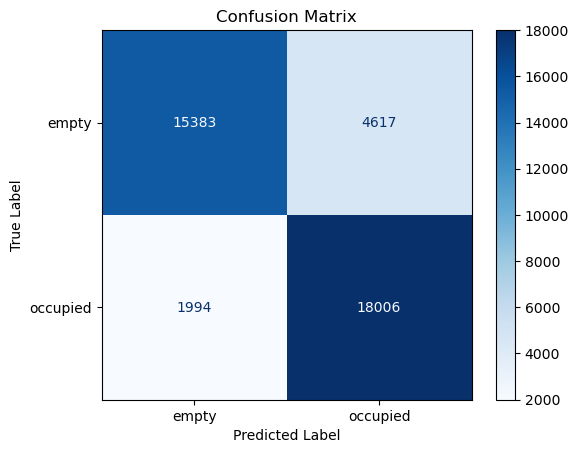

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from joblib import load
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Read Data from Text Files
empty_file_path = r"C:\Users\phamt\Documents\ML\Combined_empty3n.txt"
occupied_file_path = r"C:\Users\phamt\Documents\ML\Combined_occupied3n.txt"
# Load data function
def load_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        data = []
        rows = 0
        for line in lines:
            if line.strip():  # Check if the line is not empty
                rows += 1
                values = line.strip().split(",")  # Assuming data is comma-separated
                try:
                    # Convert strings to floats (if necessary)
                    data.append([float(value) for value in values])
                except ValueError:
                    print(f"Ignoring line {rows}: Unable to convert to floats:", values)
        return data

# Load data from files
empty_data = load_data(empty_file_path)
occupied_data = load_data(occupied_file_path)

# Combine the data from both files
combined_data = np.concatenate((empty_data, occupied_data), axis=0)

# Step 4: Load Pre-Trained Model
model_file = "mlp_classifier_model_1new.joblib"  # Path to the saved pre-trained model
loaded_model = load(model_file)  # Load the model using joblib

# Step 5: Make Predictions
new_predictions = loaded_model.predict(combined_data)
print("Predictions:", new_predictions)

# Create true labels based on the number of empty and occupied samples
true_labels = ['empty'] * len(empty_data)+  ['occupied'] * len(occupied_data)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, new_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate confusion matrix in percentage
total_samples = np.sum(conf_matrix)
cm_percent = (conf_matrix / total_samples) * 100
print("Confusion Matrix (Percentage):")
print(cm_percent)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['empty', 'occupied'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
